### Aim of this notebook is to predict the forward return of stocks in the S&P 500 Index. To start with, we will simply predict the sign of the return (Positive, Negative, Zero) but can later move on to regression.

# Imports

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# Get data

In [2]:
# Get raw data
companies = pd.read_csv("/kaggle/input/sp-500-stocks/sp500_companies.csv")
index = pd.read_csv("/kaggle/input/sp-500-stocks/sp500_index.csv", parse_dates=['Date'])
stocks = pd.read_csv("/kaggle/input/sp-500-stocks/sp500_stocks.csv", parse_dates=['Date'])

In [3]:
companies.head(10)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,425.52,3161800835072,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.065329
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,169.58,2618637418496,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.054106
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,880.08,2200200019968,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.045461
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,185.07,1922396192768,8.551500e+10,0.139,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.039721
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,153.94,1906808717312,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.039399
5,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,152.50,1901995229184,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.039299
6,NMS,META,"Meta Platforms, Inc.","Meta Platforms, Inc.",Communication Services,Internet Content & Information,527.34,1344406028288,6.138100e+10,0.247,Menlo Park,CA,United States,67317.0,"Meta Platforms, Inc. engages in the developmen...",0.027778
7,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance - Diversified,418.62,905144369152,1.356820e+11,0.196,Omaha,NE,United States,396500.0,"Berkshire Hathaway Inc., through its subsidiar...",0.018702
8,NYQ,LLY,Eli Lilly and Company,Eli Lilly and Company,Healthcare,Drug Manufacturers - General,784.21,745600253952,1.231460e+10,0.281,Indianapolis,IN,United States,43000.0,"Eli Lilly and Company discovers, develops, and...",0.015406
9,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,1339.43,620720029696,2.040400e+10,0.164,Palo Alto,CA,United States,20000.0,"Broadcom Inc. designs, develops, and supplies ...",0.012825


In [4]:
index.head(10)

,Date,S&P500
0,2014-04-07,1845.04
1,2014-04-08,1851.96
2,2014-04-09,1872.18
3,2014-04-10,1833.08
4,2014-04-11,1815.69
5,2014-04-14,1830.61
6,2014-04-15,1842.98
7,2014-04-16,1862.31
8,2014-04-17,1864.85
9,2014-04-21,1871.89


In [5]:
stocks.head(10)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0
5,2010-01-11,MMM,46.959095,70.217392,70.735786,69.740807,70.551842,3500812.0
6,2010-01-12,MMM,46.998230,70.275917,70.384613,69.648827,69.882942,3626033.0
7,2010-01-13,MMM,46.847260,70.050163,70.326088,69.565216,70.326088,3709992.0
8,2010-01-14,MMM,46.690697,69.816055,70.175583,69.749161,70.016724,3150384.0
9,2010-01-15,MMM,46.618008,69.707359,70.309364,69.289299,69.832779,4730180.0


# EDA

In [6]:
# Basic info for companies table.
print(companies.describe())
print("\n")
print(companies.info())

       Currentprice     Marketcap        Ebitda  Revenuegrowth  \
count    503.000000  5.030000e+02  4.750000e+02     501.000000   
mean     217.697614  9.621842e+10  6.519464e+09       0.042208   
std      460.681911  2.707842e+11  1.419204e+10       0.200690   
min        8.320000  6.974274e+09 -3.618000e+09      -0.582000   
25%       65.170000  1.813040e+10  1.492626e+09      -0.042000   
50%      123.580000  3.541150e+10  2.802000e+09       0.037000   
75%      229.320000  7.312428e+10  5.724304e+09       0.108000   
max     7907.890000  3.161801e+12  1.356820e+11       2.653000   

       Fulltimeemployees      Weight  
count       4.990000e+02  503.000000  
mean        5.747085e+04    0.001988  
std         1.378863e+05    0.005595  
min         2.800000e+01    0.000144  
25%         1.018550e+04    0.000375  
50%         2.150000e+04    0.000732  
75%         5.545650e+04    0.001511  
max         2.100000e+06    0.065329  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50

In [7]:
# Basic info for index table
print(index.describe())
print("\n")
print(index.info())

                                Date       S&P500
count                           2517  2517.000000
mean   2019-04-05 01:41:15.804529408  3088.561244
min              2014-04-07 00:00:00  1815.690000
25%              2016-10-04 00:00:00  2170.060000
50%              2019-04-05 00:00:00  2846.060000
75%              2021-10-04 00:00:00  3973.750000
max              2024-04-05 00:00:00  5254.350000
std                              NaN   935.892370


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   S&P500  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.5 KB
None


In [8]:
# Basic info for stocks table
print(stocks.describe())
print("\n")
print(stocks.info())

                                Date     Adj Close         Close  \
count                        1804764  1.717685e+06  1.717685e+06   
mean   2017-02-16 21:03:24.682273792  9.598639e+01  1.034187e+02   
min              2010-01-04 00:00:00  7.000000e-01  7.000000e-01   
25%              2013-07-28 06:00:00  2.928000e+01  3.517000e+01   
50%              2017-02-16 12:00:00  5.344561e+01  6.214000e+01   
75%              2020-09-10 06:00:00  1.019603e+02  1.118800e+02   
max              2024-04-05 00:00:00  8.099960e+03  8.099960e+03   
std                              NaN  1.986120e+02  1.987512e+02   

               High           Low          Open        Volume  
count  1.717685e+06  1.717685e+06  1.717685e+06  1.717685e+06  
mean   1.045538e+02  1.022234e+02  1.033957e+02  5.904034e+06  
min    7.100000e-01  6.500000e-01  7.000000e-01  0.000000e+00  
25%    3.556000e+01  3.476960e+01  3.517000e+01  9.886000e+05  
50%    6.277000e+01  6.147000e+01  6.212000e+01  2.139200e+06  
75%

In [9]:
# Check if there is any difference in constituents over time
unique_constituents = stocks.groupby('Date')['Symbol'].unique().reset_index()['Symbol']
first_constituents = unique_constituents[0]
difference = False
for u in unique_constituents:
    if len(u) != len(first_constituents):
        print("Length mismatch")
        difference = True
        break
    elif not all(f == x for f, x in zip(first_constituents, u)):
        print("Constituent mismatch")
        difference = True
        break
print(difference)

False


In [10]:
# Join index table onto stocks table
df = stocks.merge(
    right=index,
    how='left',
    left_on='Date',
    right_on='Date'
)

# Join companies table onto stocks and index table
df = df.merge(
    right=companies[['Symbol', 'Exchange', 'Sector', 'Industry', 'State']],
    how='left',
    left_on='Symbol',
    right_on='Symbol'
)

# Drop dates before 3rd April 2014 (as there is no S&P value data for these dates)
df = df[df['Date'] >= pd.to_datetime('2014-04-07')].reset_index(drop=True)

# Order by date for ease
df.sort_values(
    by='Date',
    inplace=True,
    ignore_index=True
)

In [11]:
df.head(5)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,S&P500,Exchange,Sector,Industry,State
0,2014-04-07,MMM,85.352966,112.374580,113.921402,112.366219,113.553513,3357770.0,1845.04,NYQ,Industrials,Conglomerates,MN
1,2014-04-07,ILMN,140.460007,140.460007,144.199997,136.009995,141.339996,2618100.0,1845.04,NMS,Healthcare,Diagnostics & Research,CA
2,2014-04-07,GL,47.366394,51.546665,52.286667,51.459999,52.099998,961800.0,1845.04,NYQ,Financial Services,Insurance - Life,TX
3,2014-04-07,KHC,NaN,NaN,NaN,NaN,NaN,NaN,1845.04,NMS,Consumer Defensive,Packaged Foods,PA
4,2014-04-07,EXR,33.661797,48.000000,48.750000,47.889999,48.299999,1019600.0,1845.04,NYQ,Real Estate,REIT - Industrial,UT


<Axes: title={'center': 'Value of S&P 500'}, xlabel='Date'>

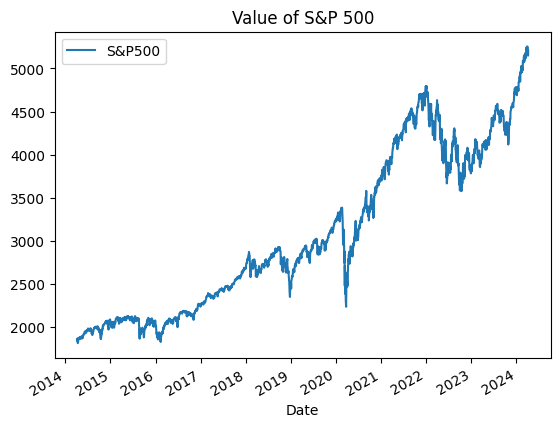

In [12]:
# Plot S&P 500 index value over time
df.plot(x='Date', y='S&P500', title='Value of S&P 500')

<Axes: title={'center': 'Median Trading Volume of S&P 500 Constituents Over Time'}, xlabel='Date'>

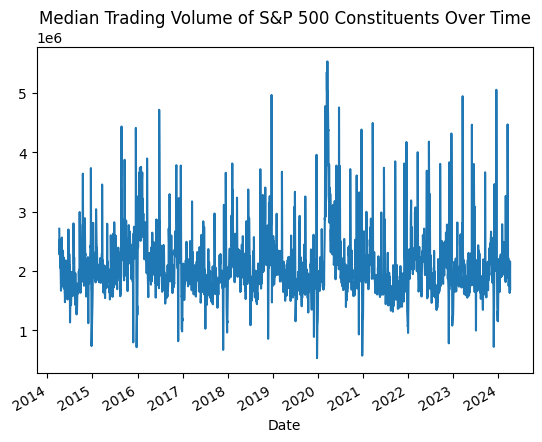

In [13]:
# Plot median trading volume over time
df.pivot(index='Date', columns='Symbol', values=['Volume']).median(axis=1).plot(title='Median Trading Volume of S&P 500 Constituents Over Time')

# Data cleaning and feature engineering

In [14]:
# One hot encode categorical features
categorical_cols = ['Exchange', 'Sector', 'Industry', 'State']
df = pd.get_dummies(
    data=df,
    columns=categorical_cols,
    dtype=int
)

df.head(10)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,S&P500,Exchange_BTS,...,State_OK,State_OR,State_PA,State_RI,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI
0,2014-04-07,MMM,85.352966,112.374580,113.921402,112.366219,113.553513,3357770.0,1845.04,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-04-07,ILMN,140.460007,140.460007,144.199997,136.009995,141.339996,2618100.0,1845.04,0,...,0,0,0,0,0,0,0,0,0,0
2,2014-04-07,GL,47.366394,51.546665,52.286667,51.459999,52.099998,961800.0,1845.04,0,...,0,0,0,0,0,1,0,0,0,0
3,2014-04-07,KHC,NaN,NaN,NaN,NaN,NaN,NaN,1845.04,0,...,0,0,1,0,0,0,0,0,0,0
4,2014-04-07,EXR,33.661797,48.000000,48.750000,47.889999,48.299999,1019600.0,1845.04,0,...,0,0,0,0,0,0,1,0,0,0
5,2014-04-07,MTD,229.220001,229.220001,235.539993,227.949997,234.649994,142200.0,1845.04,0,...,0,0,0,0,0,0,0,0,0,0
6,2014-04-07,ETN,56.519428,73.389999,75.360001,72.989998,75.190002,3325600.0,1845.04,0,...,0,0,0,0,0,0,0,0,0,0
7,2014-04-07,NI,9.981579,13.666012,14.000000,13.650295,13.866405,6961593.0,1845.04,0,...,0,0,0,0,0,0,0,0,0,0
8,2014-04-07,JKHY,48.273758,54.580002,55.820000,54.509998,55.290001,378500.0,1845.04,0,...,0,0,0,0,0,0,0,0,0,0
9,2014-04-07,HRL,19.557634,24.025000,24.125000,23.910000,23.910000,1115200.0,1845.04,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# SMAs, EMAs, Stds. Bollinger bands on the adjusted close and volume
prices = ['Adj Close']
prices_and_volumes = prices + ['Volume']
for day in [5, 12, 20, 26]:
    for p in prices_and_volumes:
        # SMA + EMA
        df[f'{day}-Day SMA {p}'] = df.groupby('Symbol')[p].transform(lambda x: x.rolling(day).mean())
        df[f'{day}-Day EMA {p}']  = df.groupby('Symbol')[p].transform(lambda x: x.ewm(span=day, min_periods=day).mean())
        
        # Standard deviations (volatility)
        df[f'{day}-Day Std {p}'] = df.groupby('Symbol')[p].transform(lambda x: x.rolling(day).std())
        
        # Bollinger bands
        df[f'{day}-Day Upper BB {p}'] = df[f'{day}-Day SMA {p}'] + (2 * df[f'{day}-Day Std {p}'])
        df[f'{day}-Day Lower BB {p}'] = df[f'{day}-Day SMA {p}'] - (2 * df[f'{day}-Day Std {p}'])
        
        # Distance to bollinger bands
        df[f'{p} vs {day}-Day Upper BB'] = df[f'{p}'] - df[f'{day}-Day Upper BB {p}']
        df[f'{p} vs {day}-Day Lower BB'] = df[f'{p}'] - df[f'{day}-Day Lower BB {p}']

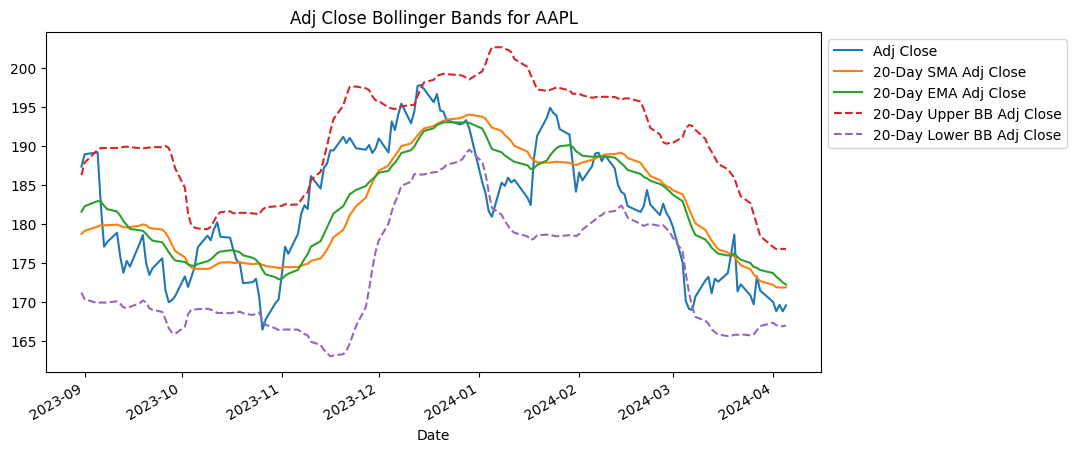

In [16]:
# Plot SMA, EMA and price for AAPL. Note how EMA responds quicker to price swings than SMA
aapl_df = df[df['Symbol'] == 'AAPL'].tail(150)
cols_to_plot = ['Adj Close', '20-Day SMA Adj Close', '20-Day EMA Adj Close', '20-Day Upper BB Adj Close', '20-Day Lower BB Adj Close']
line_styles = {'20-Day Upper BB Adj Close': '--', '20-Day Lower BB Adj Close': '--'}
ax = aapl_df.plot(x ='Date', y=cols_to_plot, figsize=(10, 5), style=line_styles, title='Adj Close Bollinger Bands for AAPL')
ax.legend(bbox_to_anchor=(1, 1))

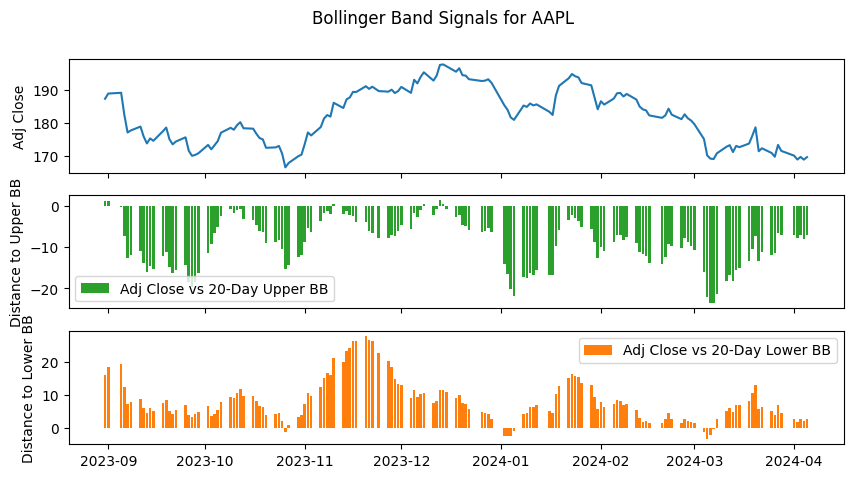

In [17]:
# Plot price vs distance to bollinger bands
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 5))  # Two subplots sharing the same x axis

# Plot the stock price on the first (top) subplot
ax1.plot(aapl_df['Date'], aapl_df['Adj Close'], color='tab:blue')
ax1.set_ylabel('Adj Close')

# Plot the BBs and distance to BBs on the second (bottom) subplot
ax2.bar(aapl_df['Date'], aapl_df['Adj Close vs 20-Day Upper BB'], color='tab:green', label='Adj Close vs 20-Day Upper BB')
ax3.bar(aapl_df['Date'], aapl_df['Adj Close vs 20-Day Lower BB'], color='tab:orange', label='Adj Close vs 20-Day Lower BB')
ax2.set_ylabel('Distance to Upper BB')
ax3.set_ylabel('Distance to Lower BB')
ax2.legend()
ax3.legend()
fig.suptitle('Bollinger Band Signals for AAPL')
plt.show()

In [18]:
# MACD https://www.investopedia.com/terms/m/macd.asp
df['MACD'] = df['12-Day EMA Adj Close'] - df['26-Day EMA Adj Close']
df['MACD Signal Line'] = df.groupby('Symbol')['MACD'].transform(lambda x: x.ewm(span=9, min_periods=9).mean())
df['MACD Histogram'] = df['MACD'] - df['MACD Signal Line']

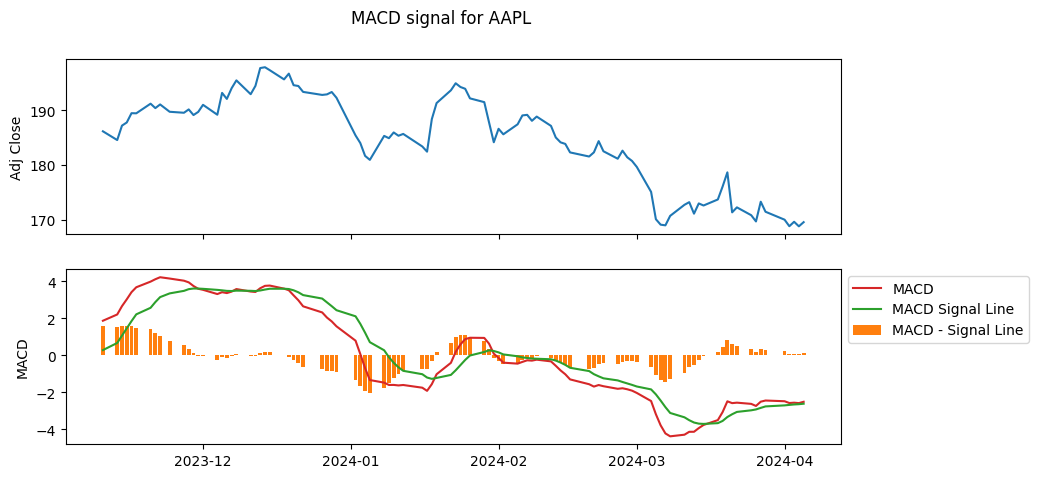

In [19]:
# Plot MACD and MACD Signal for AAPL
aapl_df = df[df['Symbol'] == 'AAPL'].tail(100)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5))  # Two subplots sharing the same x axis

# Plot the stock price on the first (top) subplot
ax1.plot(aapl_df['Date'], aapl_df['Adj Close'], color='tab:blue')
ax1.set_ylabel('Adj Close')

# Plot the MACD line and signal line on the second (bottom) subplot
ax2.plot(aapl_df['Date'], aapl_df['MACD'], color='tab:red', label='MACD')
ax2.plot(aapl_df['Date'], aapl_df['MACD Signal Line'], color='tab:green', label='MACD Signal Line')
ax2.bar(aapl_df['Date'], aapl_df['MACD Histogram'], color='tab:orange', label='MACD - Signal Line')
ax2.set_ylabel('MACD')
ax2.legend(bbox_to_anchor=(1, 1))
fig.suptitle('MACD signal for AAPL')
plt.show()

In [20]:
# Calculate average true range (ATR) which is a measure of volatility
df['High minus Low'] = df['High'] - df['Low']
df['Yesterday Adj Close'] = df.groupby('Symbol')['Adj Close'].shift(1)
df['Abs. High - Yesterday Adj Close'] = (df['High'] - df['Yesterday Adj Close']).abs()
df['Abs. Low - Yesterday Adj Close'] = (df['Low'] - df['Yesterday Adj Close']).abs()
df['True Range'] = df[['High minus Low', 'Abs. High - Yesterday Adj Close', 'Abs. Low - Yesterday Adj Close']].max(axis=1)
df.drop(['High minus Low', 'Abs. High - Yesterday Adj Close', 'Abs. Low - Yesterday Adj Close'], axis=1, inplace=True)
df['26-Day Average True Range'] = df.groupby('Symbol')['True Range'].transform(lambda x: x.rolling(26).mean())

# Calculate MACD-V
df['MACD-V'] = 100 * (df['12-Day EMA Adj Close'] - df['26-Day EMA Adj Close']) / df['26-Day Average True Range']
df['MACD-V Signal Line'] = df.groupby('Symbol')['MACD-V'].transform(lambda x: x.ewm(span=9, min_periods=9).mean())
df['MACD-V Histogram'] = df['MACD-V'] - df['MACD-V Signal Line']

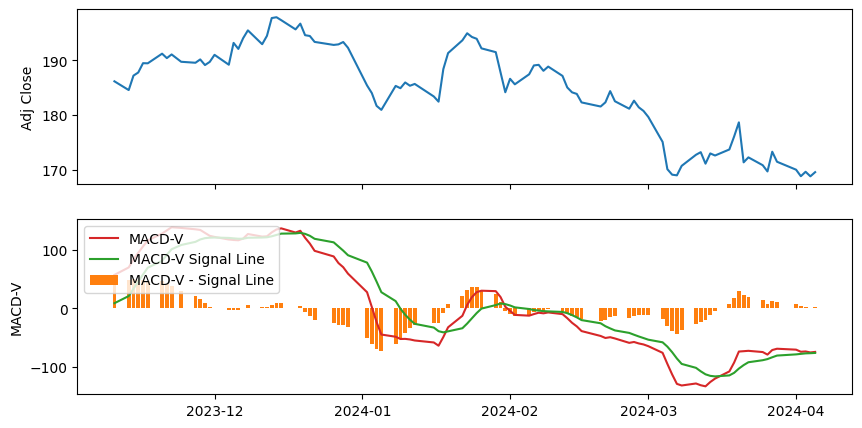

In [21]:
# Plot MACD-V and MACD-V Signal for AAPL
aapl_df = df[df['Symbol'] == 'AAPL'].tail(100)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5))  # Two subplots sharing the same x axis

# Plot the stock price on the first (top) subplot
ax1.plot(aapl_df['Date'], aapl_df['Adj Close'], color='tab:blue')
ax1.set_ylabel('Adj Close')

# Plot the MACD-V line and signal line on the second (bottom) subplot
ax2.plot(aapl_df['Date'], aapl_df['MACD-V'], color='tab:red', label='MACD-V')
ax2.plot(aapl_df['Date'], aapl_df['MACD-V Signal Line'], color='tab:green', label='MACD-V Signal Line')
ax2.bar(aapl_df['Date'], aapl_df['MACD-V Histogram'], color='tab:orange', label='MACD-V - Signal Line')
ax2.set_ylabel('MACD-V')
ax2.legend(loc='upper left')
plt.show()

In [22]:
# Backward returns
for day in range(1, 26, 2):
    df[f'{day}-day Backward Adj Close'] = df.groupby('Symbol')['Adj Close'].shift(day)
    df[f'{day}-day Backward Return'] = (df['Adj Close'] - df[f'{day}-day Backward Adj Close']) / df[f'{day}-day Backward Adj Close']
    df.drop(f'{day}-day Backward Adj Close', axis=1, inplace=True)

In [23]:
# Forward returns
df['3-week Forward Adj Close'] = df.groupby('Symbol')['Adj Close'].shift(-5 * 3)
df['3-week Forward S&P Value'] = df.groupby('Symbol')['S&P500'].shift(-5 * 3)
df['3-week Forward S&P Return'] = (df['3-week Forward S&P Value'] - df['S&P500']) / df['S&P500']
df['3-week Forward Return'] = (df['3-week Forward Adj Close'] - df['Adj Close']) / df['Adj Close']
df['3-week Forward Excess Return'] = df['3-week Forward Return'] - df['3-week Forward S&P Return']

# Create targets from forward returns (sign of return)
df['3-week Forward Excess Return Sign'] = np.sign(df['3-week Forward Excess Return'])
df.drop(['3-week Forward Adj Close', '3-week Forward S&P Value', '3-week Forward S&P Return', '3-week Forward Return', '3-week Forward Excess Return'], axis=1, inplace=True)

# Replace symbol with stock id
df['Symbol'] = df['Symbol'].rank(method='dense', ascending=False).astype(int)

# Replace date with unique date ID
df['Date'] = df['Date'].rank(method='dense', ascending=True).astype(int)

In [24]:
df.head(5)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,S&P500,Exchange_BTS,...,9-day Backward Return,11-day Backward Return,13-day Backward Return,15-day Backward Return,17-day Backward Return,19-day Backward Return,21-day Backward Return,23-day Backward Return,25-day Backward Return,3-week Forward Excess Return Sign
0,1,190,85.352966,112.374580,113.921402,112.366219,113.553513,3357770.0,1845.04,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,261,140.460007,140.460007,144.199997,136.009995,141.339996,2618100.0,1845.04,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2,1,297,47.366394,51.546665,52.286667,51.459999,52.099998,961800.0,1845.04,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1,235,NaN,NaN,NaN,NaN,NaN,NaN,1845.04,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,324,33.661797,48.000000,48.750000,47.889999,48.299999,1019600.0,1845.04,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266051 entries, 0 to 1266050
Columns: 260 entries, Date to 3-week Forward Excess Return Sign
dtypes: float64(86), int64(174)
memory usage: 2.5 GB


In [26]:
# Write to file
df.to_csv(path_or_buf="all_data.csv")